# Regression Example - Temperature

This is the regression example with temperature data for working with _SeqRep_ package.

You can [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MIR-MU/seqrep/blob/main/examples/RegressionExample-Temperature.ipynb)
or
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/MIR-MU/seqrep/main?labpath=examples%2FRegressionExample-Temperature.ipynb).


## Install _SeqRep_ Package

In [1]:
# !python -m pip install git+https://github.com/MIR-MU/seqrep
!pip install --extra-index-url https://test.pypi.org/simple/ seqrep==0.0.1
# !python3 -m pip install --pre --upgrade -i https://test.pypi.org/simple/ seqrep==0.0.1 -vvv

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [1]:
# !pip install numpy>=1.20.3
# !pip install hrv-analysis>=1.0.4
# !pip install numpy-ext>=0.9.6
# !pip install ta>=0.8.0

In [2]:
# !pip install pandas-ta==0.3.14b0

# import pandas_ta
# print()
# pandas_ta.__version__

## Import Needed Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor, TheilSenRegressor

from seqrep import *
from seqrep.feature_engineering import *
from seqrep.labeling import *
from seqrep.splitting import *
from seqrep.scaling import *
from seqrep.feature_reduction import *
from seqrep.evaluation import *
from seqrep.pipeline_evaluation import *

In [4]:
def highlight(x, value=min):
    """
    Helper function for higligting particular cells in dataframe.
    """
    return ["font-weight: bold" if v == value(x) else "" for v in x]

## Download Dataset

In [5]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2022-01-12 12:01:41--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.005s  

2022-01-12 12:01:41 (13.6 MB/s) - ‘daily-min-temperatures.csv’ saved [67921/67921]



In [6]:
df = pd.read_csv(
    "daily-min-temperatures.csv",
    index_col=0,
    parse_dates=True,
)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [7]:
df.isna().sum()

Temp    0
dtype: int64

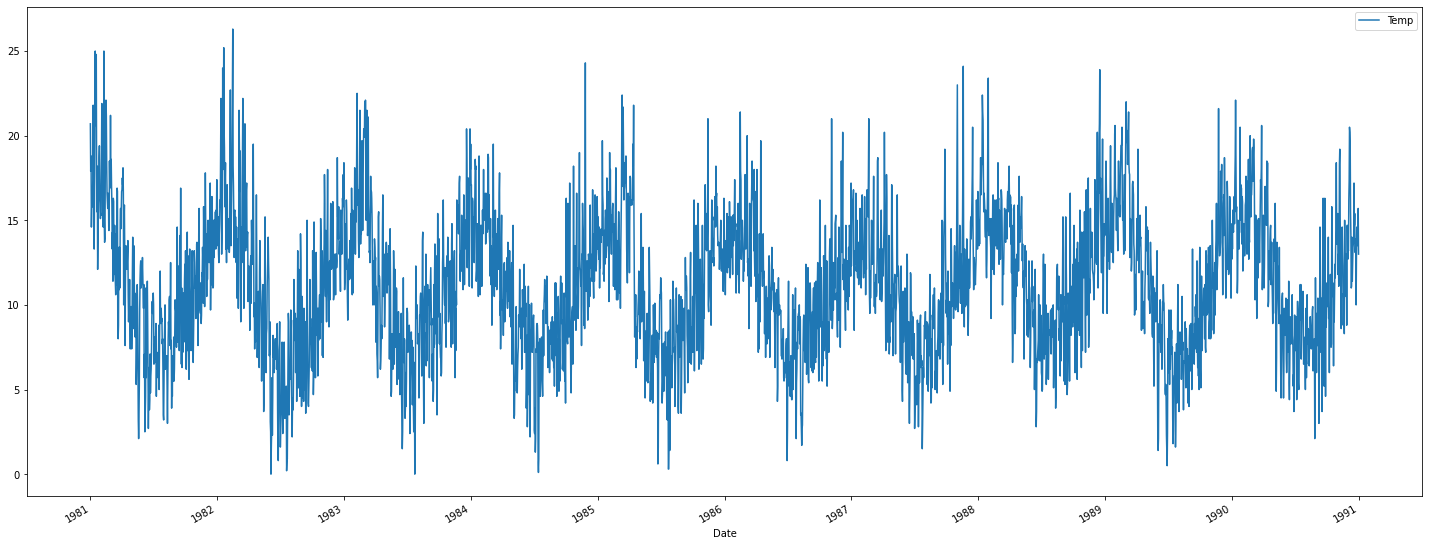

In [8]:
df.plot(figsize=(25, 10))
plt.show()

## Fix the code - TODO: Remove!!!

In [9]:
# # from seqrep.utils import Picklable

# class PipelineEvaluator(Picklable):
#     """
#     PipelineEvaluator contains all modules and triggers them.
#     """

#     def __init__(
#         self,
#         labeler: Labeler = None,
#         splitter: Splitter = None,
#         pipeline: Pipeline = None,
#         feature_reductor: FeatureReductor = None,
#         model=None,
#         evaluator: Evaluator = None,
#         dropna: bool = True,
#         downprojector=None,
#         visualize: Union[bool, List[str]] = False,
#         verbose: bool = True,
#     ):
#         self.labeler = labeler
#         self.splitter = splitter
#         self.pipeline = pipeline
#         self.feature_reductor = feature_reductor
#         self.model = model
#         self.evaluator = evaluator
#         self.dropna = dropna
#         self.downprojector = downprojector
#         self.visualize = visualize
#         self.verbose = verbose

#         if isinstance(self.visualize, bool):
#             if self.visualize:
#                 self.visualize = [
#                     "labeler",
#                     "splitter",
#                     "pipeline",
#                     "feature_reductor",
#                     "model",
#                     "evaluator",
#                 ]
#             else:
#                 self.visualize = []

#     def _log(self, text) -> None:
#         """
#         Print actual time and provided text if verobse is True.

#         Parameters
#         ----------
#         text: string
#             Comment added to printed time.
#         """

#         if self.verbose:
#             print(datetime.datetime.now().time().strftime("%H:%M:%S.%f")[:-3], text)

#     def _drop_na(self, X: pd.DataFrame, y: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
#         """
#         Drop rows with NaN values from begining.

#         Returns
#         -------
#         X, y : tupple (pd.DataFrame, pd.Series)
#             X as data (with features) and y as labels.
#         """

#         original_shape = X.shape
#         X.dropna(axis=1, thresh=int(X.shape[0] * 0.9), inplace=True)
#         cut_number = X.isna().sum().max()
#         X = X.iloc[cut_number:, :]
#         if X.isna().sum().sum() > 0:
#             X = X.dropna(axis=0)
#         y = y.loc[X.index]
#         self._log(
#             f"\tOriginal shape:\t\t{original_shape}; \n\t\tshape after removing NaNs: {X.shape}."
#         )
#         return X, y

#     def run(self, data):
#         """
#         Run each module on provided data.

#         Parameters
#         ----------
#         data : array-like
#             Data to evaluate the pipeline on.

#         Returns
#         -------
#         result : dict
#             Dict of calculated metric values labeled by their names.
#         """

#         if self.labeler is not None:
#             self._log("Labeling data")
#             labels = self.labeler.transform(data)
#             self.output = labels
#             if "labeler" in self.visualize:
#                 self.labeler.visualize(labels=labels)

#         if self.splitter is not None:
#             self._log("Splitting data")
#             labels = self.output
#             self.output = self.splitter.transform(X=data, y=labels)
#             X_train, X_test, y_train, y_test = self.output
#             if "splitter" in self.visualize:
#                 self.splitter.visualize(X=[X_train, X_test])

#         if self.pipeline is not None:
#             self._log("Fitting pipeline")
#             X_train, X_test, y_train, y_test = self.output
#             X_train = self.pipeline.fit_transform(X_train, y_train)
#             self._log("Applying pipeline transformations")
#             X_test = self.pipeline.transform(X_test)
#             self.output = X_train, X_test, y_train, y_test

#         if self.dropna:
#             X_train, X_test, y_train, y_test = self.output
#             X_train, y_train = self._drop_na(X=X_train, y=y_train)
#             X_test, y_test = self._drop_na(X=X_test, y=y_test)
#             self.output = X_train, X_test, y_train, y_test

#         if "pipeline" in self.visualize:
#             visualize_data(
#                 X=X_train,
#                 y=y_train,
#                 downprojector=self.downprojector,
#                 title="Visualization of pipeline output",
#             )

#         if self.feature_reductor is not None:
#             self._log("Applying feature reduction")
#             X_train, X_test, y_train, y_test = self.output
#             self.feature_reductor.fit(X_train, y_train)
#             X_train = self.feature_reductor.transform(X_train)
#             X_test = self.feature_reductor.transform(X_test)
#             if "feature_reductor" in self.visualize:
#                 self.feature_reductor.visualize(
#                     X=X_train,
#                     y=y_train,
#                     downprojector=self.downprojector,
#                     title="Visualization of FeatureReductor output",
#                 )
#             self.output = X_train, X_test, y_train, y_test

#         if self.model is not None:
#             self._log("Fitting model")
#             X_train, X_test, y_train, y_test = self.output if self.output is not None else data
#             self.model.fit(X_train, y_train)
#             if "model" in self.visualize:
#                 y_pred = self.model.predict(X_train)
#                 if len(y_pred.shape) == 1 or y_pred.shape[1] == 1:
#                     y_pred = pd.Series(y_pred, index=X_train.index)
#                 else:
#                     y_pred = pd.DataFrame(y_pred, index=X_train.index)
#                 visualize_labels(
#                     labels=pd.DataFrame({"y_true": y_train, "y_pred": y_pred}),
#                     title="Visualize TRAIN predictions and true values",
#                 )
#                 # self.output = y_train, y_pred

#             self._log("Predicting")
#             y_pred = self.model.predict(X_test)
#             if len(y_pred.shape) == 1 or y_pred.shape[1] == 1:
#                 y_pred = pd.Series(y_pred, index=X_test.index)
#             else:
#                 y_pred = pd.DataFrame(y_pred, index=X_test.index)

#             self.output = y_test, y_pred

#             if self.evaluator is not None:
#                 self._log("Evaluating predictions")
#                 y_test, y_pred = self.output
#                 result = self.evaluator.evaluate(y_true=y_test, y_pred=y_pred)
#                 if "evaluator" in self.visualize:
#                     self.evaluator.visualize(y_true=y_test, y_pred=y_pred)
#                 return result

#         return self.output

In [10]:
class PipelineEvaluator(Picklable):
    """
    PipelineEvaluator contains all modules and triggers them.
    """

    def __init__(
        self,
        labeler: Labeler = None,
        splitter: Splitter = None,
        pipeline: Pipeline = None,
        feature_reductor: FeatureReductor = None,
        model=None,
        evaluator: Evaluator = None,
        dropna: bool = True,
        downprojector=None,
        visualize: Union[bool, List[str]] = False,
        verbose: bool = True,
    ):
        self.labeler = labeler
        self.splitter = splitter
        self.pipeline = pipeline
        self.feature_reductor = feature_reductor
        self.model = model
        self.evaluator = evaluator
        self.dropna = dropna
        self.downprojector = downprojector
        self.visualize = visualize
        self.verbose = verbose

        if isinstance(self.visualize, bool):
            if self.visualize:
                self.visualize = [
                    "labeler",
                    "splitter",
                    "pipeline",
                    "feature_reductor",
                    "model",
                    "evaluator",
                ]
            else:
                self.visualize = []

    def _log(self, text) -> None:
        """
        Print actual time and provided text if verobse is True.

        Parameters
        ----------
        text: string
            Comment added to printed time.
        """

        if self.verbose:
            print(datetime.datetime.now().time().strftime("%H:%M:%S.%f")[:-3], text)

    def _drop_na(self, X: pd.DataFrame, y: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
        """
        Drop rows with NaN values from begining.

        Returns
        -------
        X, y : tupple (pd.DataFrame, pd.Series)
            X as data (with features) and y as labels.
        """

        original_shape = X.shape
        X.dropna(axis=1, thresh=int(X.shape[0] * 0.9), inplace=True)
        cut_number = X.isna().sum().max()
        X = X.iloc[cut_number:, :]
        if X.isna().sum().sum() > 0:
            X = X.dropna(axis=0)
        y = y.loc[X.index]
        self._log(
            f"\tOriginal shape:\t\t{original_shape}; \n\t\tshape after removing NaNs: {X.shape}."
        )
        return X, y

    def run(self, data=None):
        """
        Run each module on provided data.

        Parameters
        ----------
        data : array-like
            Data to evaluate the pipeline on.

        Returns
        -------
        result : dict
            Dict of calculated metric values labeled by their names.
        """

        if self.labeler is not None:
            self._log("Labeling data")
            self.labels = self.labeler.transform(data)
            if "labeler" in self.visualize:
                self.labeler.visualize(labels=self.labels)

        if self.splitter is not None:
            self._log("Splitting data")
            (
                self.X_train,
                self.X_test,
                self.y_train,
                self.y_test,
            ) = self.splitter.transform(X=data, y=self.labels)
            if "splitter" in self.visualize:
                self.splitter.visualize(X=[self.X_train, self.X_test])

        if self.pipeline is not None:
            self._log("Fitting pipeline")
            self.X_train = self.pipeline.fit_transform(self.X_train, self.y_train)
            self._log("Applying pipeline transformations")
            self.X_test = self.pipeline.transform(self.X_test)

        if self.dropna:
            self.X_train, self.y_train = self._drop_na(X=self.X_train, y=self.y_train)
            self.X_test, self.y_test = self._drop_na(X=self.X_test, y=self.y_test)

        if "pipeline" in self.visualize:
            visualize_data(
                X=self.X_train,
                y=self.y_train,
                downprojector=self.downprojector,
                title="Visualization of pipeline output",
            )

        if self.feature_reductor is not None:
            self._log("Applying feature reduction")
            self.feature_reductor.fit(self.X_train, self.y_train)
            self.X_train = self.feature_reductor.transform(self.X_train)
            self.X_test = self.feature_reductor.transform(self.X_test)
            if "feature_reductor" in self.visualize:
                self.feature_reductor.visualize(
                    X=self.X_train,
                    y=self.y_train,
                    downprojector=self.downprojector,
                    title="Visualization of FeatureReductor output",
                )

        if self.model is not None:
            self._log("Fitting model")
            self.model.fit(self.X_train, self.y_train)
            if "model" in self.visualize:
                self.y_pred = self.model.predict(self.X_train)
                if len(self.y_pred.shape) == 1 or self.y_pred.shape[1] == 1:
                    self.y_pred = pd.Series(self.y_pred, index=self.X_train.index)
                else:
                    self.y_pred = pd.DataFrame(self.y_pred, index=self.X_train.index)
                visualize_labels(
                    labels=pd.DataFrame(
                        {"y_true": self.y_train, "y_pred": self.y_pred}
                    ),
                    title="Visualize TRAIN predictions and true values",
                )

            self._log("Predicting")
            self.y_pred = self.model.predict(self.X_test)
            if len(self.y_pred.shape) == 1 or self.y_pred.shape[1] == 1:
                self.y_pred = pd.Series(self.y_pred, index=self.X_test.index)
            else:
                self.y_pred = pd.DataFrame(self.y_pred, index=self.X_test.index)

            if self.evaluator is not None:
                self._log("Evaluating predictions")
                result = self.evaluator.evaluate(y_true=self.y_test, y_pred=self.y_pred)
                if "evaluator" in self.visualize:
                    self.evaluator.visualize(y_true=self.y_test, y_pred=self.y_pred)
                return result

### Already fixed

In [11]:
# class RegressionLabeler(Labeler):
#     """
#     Find the maximum and minimum value change during selected future steps.

#     Parameters
#     ----------
#     duration: int
#         Maximal length for reaching label value

#     positive: str
#         Column of the move in the positive direction.

#     negative: str
#         Column of the move in the negative direction.

#     base: str
#         Column of the reference value.
#     """

#     def __init__(self, duration: int = 1, positive: str = "high", negative: str = "low", base: str = "close"):
#         self.duration = duration
#         self.positive = positive
#         self.negative = negative
#         self.base = base

#     def transform(self, X, y=None):
#         labels = pd.DataFrame(index=X.index)
#         labels["positive_label"] = (
#             X[self.positive].shift(-self.duration).rolling(self.duration).max()
#         )
#         labels["negative_label"] = (
#             X[self.negative].shift(-self.duration).rolling(self.duration).min()
#         )
#         for i in range(self.duration - 1):
#             labels.loc[labels.index[i], ("positive_label",)] = X[self.positive][
#                 i : i + self.duration - 1
#             ].max()
#             labels.loc[labels.index[i], ("negative_label",)] = X[self.negative][
#                 i : i + self.duration - 1
#             ].min()
#         labels["positive_label"] -= X[self.base]
#         labels["negative_label"] -= X[self.base]
#         if self.positive == self.negative:
#             return labels["positive_label"].rename({"positive_label": "label"})
#         return labels

################################################################################

# class RegressionEvaluator(Evaluator):
#     """
#     Evaluator for regression results.

#     RegressionEvaluator calculates Mean Absolute Error, Mean Squared Error
#     (and its root) and R2 score.
#     """

#     def _drop_na(self, y_true: Union[pd.Series, pd.DataFrame], y_pred: Union[pd.Series, pd.DataFrame]) -> Tuple[Union[pd.Series, pd.DataFrame], Union[pd.Series, pd.DataFrame]]:
#         y_true = y_true.dropna(axis=0)
#         y_pred = y_pred.loc[y_true.index]
#         return y_true, y_pred

#     def evaluate(self, y_true: Union[pd.Series, pd.DataFrame], y_pred: Union[pd.Series, pd.DataFrame]) -> Dict[str, float]:
#         y_true, y_pred = self._drop_na(y_true, y_pred)

#         mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
#         mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
#         rmse = np.sqrt(mse)
#         r2 = r2_score(y_true=y_true, y_pred=y_pred)
#         results = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

#         print(
#             f"""MAE:  {mae:>6.4f}
# MSE:  {mse:>6.4f}
# RMSE: {rmse:>6.4f}
# R2:   {r2:>6.4f}
# """
#         )
#         return results

################################################################################

# class FuncApplyFeatureExtractor(FeatureExtractor):
#     """
#     Apply the specified function to extract features.

#     Attributes
#     ----------
#     func : callable
#         Function to apply on data.

#     columns_to_apply: string or List
#         Column names of data if it is list (function gets pd.DatFrame).
#         Name of one column if it is string (function gets pd.Series).
#     """

#     def __init__(self, func, columns_to_apply: Union[str, List[str]], rsuffix: str = "_"):
#         self.func = func
#         self.columns_to_apply = columns_to_apply
#         self.rsuffix = rsuffix

#     def transform(self, X, y=None) -> pd.DataFrame:
#         """
#         Apply the specified function on data.

#         Parameters
#         ----------
#         X : iterable
#             Data to transform.

#         y : iterable, default=None
#             Training targets.

#         Returns
#         -------
#         Xt : array-like of shape  (n_samples, n_transformed_features)
#         """
#         new_features = self.func(X[self.columns_to_apply])
#         return X.join(new_features, rsuffix=self.rsuffix)

################################################################################

# class HRVExtractor(FeatureExtractor):
#     """
#     Add Heart Rate Variability analysis features.

#     Attributes
#     ----------
#     window : int
#         Size of window (number of items - i.e. rows) for calculation of statistics.
#     columns : list
#         Columns from which to be calculated new features.
#     methods : list
#         List of funkcions from hrvanalysis.extract_features to be used.
#     n_jobs : int, optional
#         Parallel tasks count for joblib. If 1, joblib won’t be used. Default is 1.
#     """

#     def __init__(
#         self,
#         window: int = 10,
#         columns: list = None,
#         methods: list = [
#             get_time_domain_features,
#             get_geometrical_features,
#             get_frequency_domain_features,
#             get_csi_cvi_features,
#             get_poincare_plot_features,
#             get_sampen,
#         ],
#         n_jobs: int = 1,
#     ):
#         self.window = window
#         self.columns = columns
#         self.methods = methods
#         self.n_jobs = n_jobs

#     def transform(self, X, y=None) -> pd.DataFrame:
#         """
#         Calculates HRV features by selected methods.

#         Parameters
#         ----------
#         X : iterable
#             Data to transform.

#         y : iterable, default=None
#             Training targets.

#         Returns
#         -------
#         Xt : array-like of shape  (n_samples, n_transformed_features)
#         """

#         if self.columns is None:
#             self.columns = [X.columns[-1]]

#         for column in tqdm(self.columns, leave=False, desc="Calculating columns"):
#             for method in tqdm(self.methods, leave=False, desc="Calculating methods"):
#                 x_column = X[column].dropna(axis=0)
#                 features = pd.DataFrame.from_records(
#                     rolling_apply(method, self.window, x_column, n_jobs=self.n_jobs)[
#                         self.window - 1 :
#                     ],
#                     index=x_column.index[self.window - 1 :],
#                 )
#                 features = features.add_suffix(f"-{column}")
#                 X = X.join(features)
#         X.replace([np.inf, -np.inf], np.nan, inplace=True)
#         return X

## Simple Approach
In this section, only the original temperature values (one feature) is used.

In [12]:
# This DataFrame collects the results of various runs for comparison.

# Uncomment following line if you want to clear the DataFrame with the results.
# del results_for_comparison

try:
    results_for_comparison
except NameError:
    print("Create new empty DataFrame.")
    results_for_comparison = pd.DataFrame()
else:
    print("DataFrame already exist!")

Create new empty DataFrame.


In [13]:
# !pip install neuralprophet[live]
# from neuralprophet import NeuralProphet

In [14]:
%%capture --no-stdout --no-display

# run_identification = "Short identification of this run"

pipe = Pipeline(
    [
        ("scale_u", UniversalScaler(scaler=MinMaxScaler())),
        # ("scale_u", UniversalScaler(scaler=StandardScaler())),
    ]
)

pipe_eval = PipelineEvaluator(
    labeler=RegressionLabeler(positive="Temp", negative="Temp", base="Temp"),
    splitter=TrainTestSplitter(),
    pipeline=pipe,
    evaluator=RegressionEvaluator(),
)

models = [
    LinearRegression(),
    MLPRegressor(shuffle=False),
    HuberRegressor(),
    TheilSenRegressor(),
]

for model in models:
    print()
    print(model)
    pipe_eval.model = model
    result = pipe_eval.run(data=df)

    results_for_comparison = results_for_comparison.append(
        pd.Series(result, name=f"Simple pipeline with {str(pipe_eval.model)} model"),
    )


LinearRegression()
12:01:42.042 Labeling data
12:01:42.104 Splitting data
12:01:42.106 Fitting pipeline
12:01:42.111 Applying pipeline transformations
12:01:42.116 	Original shape:		(2737, 1); 
		shape after removing NaNs: (2737, 1).
12:01:42.120 	Original shape:		(913, 1); 
		shape after removing NaNs: (913, 1).
12:01:42.120 Fitting model
12:01:42.145 Predicting
12:01:42.147 Evaluating predictions
MAE:  1.9697 
MSE:  6.2517
RMSE: 2.5003
R2:   0.1090


MLPRegressor(shuffle=False)
12:01:42.155 Labeling data
12:01:42.183 Splitting data
12:01:42.186 Fitting pipeline
12:01:42.190 Applying pipeline transformations
12:01:42.197 	Original shape:		(2737, 1); 
		shape after removing NaNs: (2737, 1).
12:01:42.205 	Original shape:		(913, 1); 
		shape after removing NaNs: (913, 1).
12:01:42.205 Fitting model
12:01:42.632 Predicting
12:01:42.636 Evaluating predictions
MAE:  1.9687 
MSE:  6.2496
RMSE: 2.4999
R2:   0.1093


HuberRegressor()
12:01:42.643 Labeling data
12:01:42.685 Splitting data
12:0

In [15]:
# X_train, X_test, y_train, y_test = pipe_eval.output
# model = NeuralProphet()
# X_train["ds"] = X_train.index
# X_train = X_train.rename(columns={"Temp": "y"})
# X_test["ds"] = X_test.index
# X_test = X_test.rename(columns={"Temp": "y"})
# # model.fit(X_train, y_train)
# model.fit(X_train, freq='D')
# y_pred = model.predict(X_test)

# RegressionEvaluator().evaluate(y_true=y_test, y_pred=y_pred)

In [16]:
# y_pred["y_test"] = y_test
# y_pred

In [17]:
# %debug

In [18]:
results_for_comparison.reset_index().style.apply(
    highlight, subset=["MAE", "MSE", "RMSE"]
).apply(highlight, subset=["R2"], value=max)

,index,MAE,MSE,R2,RMSE
0,Simple pipeline with LinearRegression() model,1.969663,6.251703,0.109041,2.500341
1,Simple pipeline with MLPRegressor(shuffle=False) model,1.968672,6.249615,0.109339,2.499923
2,Simple pipeline with HuberRegressor() model,1.968107,6.247563,0.109631,2.499513
3,Simple pipeline with TheilSenRegressor(max_subpopulation=10000) model,1.966652,6.246400,0.109797,2.499280


## Approach with Feature Engineering (FE)

Derived features (calculated from the original temperature) are added for this approach.

In [19]:
# This DataFrame collects the results of various runs for comparison.

# Uncomment following line if you want to clear the DataFrame with the results.
# del results_approach_FS

try:
    results_approach_FS
except NameError:
    print("Create new empty DataFrame.")
    results_approach_FS = pd.DataFrame()
else:
    print("DataFrame already exist!")

Create new empty DataFrame.


In [20]:
%%capture --no-stdout --no-display

pipe = Pipeline(
    [
        ("fext_prev", PreviousValuesExtractor()),
        ("fext_prev2", PreviousValuesExtractor(shift=2)),
        ("fext_prev3", PreviousValuesExtractor(shift=3)),
        (
            "fext_time",
            TimeFeaturesExtractor(
                intervals=["weekday", "day", "weekofyear", "month", "year"]
            ),
        ),
        (
            "fext_func0",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(10).mean(), columns_to_apply="Temp"
            ),
        ),
        (
            "fext_func1",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(20).mean(),
                columns_to_apply="Temp",
                rsuffix="-",
            ),
        ),
        # ('fext0', HRVExtractor(columns=["Temp"])),
        ("fext0", HRVExtractor()),
        ("scale_u", UniversalScaler(scaler=MinMaxScaler())),
        # ("scale_u", UniversalScaler(scaler=StandardScaler())),
    ]
)

pipe_prep = PipelineEvaluator(
    labeler=RegressionLabeler(positive="Temp", negative="Temp", base="Temp"),
    splitter=TrainTestSplitter(),
    pipeline=pipe,
    feature_reductor=UnivariateFeatureSelector(number=0.8),
)

# prep_output = pipe_prep.run(data=df)
pipe_prep.run(data=df)
print()

for model in models:
    print()
    print(model)
    pipe_eval = PipelineEvaluator(
        model=model,
        evaluator=RegressionEvaluator(),
    )
    for attribute in ["X_train", "X_test", "y_train", "y_test"]:
        value = getattr(pipe_prep, attribute)
        setattr(pipe_eval, attribute, value)

    result = pipe_eval.run()

    results_approach_FS = results_approach_FS.append(
        pd.Series(
            result,
            name=f"Approach with FE with {str(pipe_eval.model)} model_{models.index(model)}",
        ),
    )

12:01:43.812 Labeling data
12:01:43.850 Splitting data
12:01:43.853 Fitting pipeline


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

12:01:51.118 Applying pipeline transformations


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

12:01:53.600 	Original shape:		(2737, 47); 
		shape after removing NaNs: (2709, 41).
12:01:53.606 	Original shape:		(913, 47); 
		shape after removing NaNs: (885, 41).
12:01:53.606 Applying feature reduction


LinearRegression()
12:01:53.652 	Original shape:		(2709, 32); 
		shape after removing NaNs: (2709, 32).
12:01:53.656 	Original shape:		(885, 32); 
		shape after removing NaNs: (885, 32).
12:01:53.657 Fitting model
12:01:53.670 Predicting
12:01:53.679 Evaluating predictions
MAE:  1.8393 
MSE:  5.4513
RMSE: 2.3348
R2:   0.2271


MLPRegressor(shuffle=False)
12:01:53.694 	Original shape:		(2709, 32); 
		shape after removing NaNs: (2709, 32).
12:01:53.704 	Original shape:		(885, 32); 
		shape after removing NaNs: (885, 32).
12:01:53.707 Fitting model
12:01:55.753 Predicting
12:01:55.758 Evaluating predictions
MAE:  1.8108 
MSE:  5.2657
RMSE: 2.2947
R2:   0.2534


HuberRegressor()
12:01:55.771 	Original shape:		(2709, 32); 
		shape after removing NaNs: (2709, 32).
12:01:55.775 	Origina

In [21]:
# # vars(pipe_prep)
# pipe_eval = PipelineEvaluator(
#         model = model,
#         evaluator=RegressionEvaluator(),
#     )
# print(vars(pipe_eval))
# # for attribute, value in vars(pipe_prep).items():
# for attribute in dir(pipe_prep):
#     if attribute.startswith('__') or callable(getattr(pipe_prep, attribute)):
#         continue
# # for attribute in ["X_train", "X_test", "y_train", "y_test"]:
#     value = getattr(pipe_prep, attribute)
#     setattr(pipe_eval, attribute, value)
# print()
# print(20*"# ")
# print()
# vars(pipe_eval)

In [22]:
# %debug
# results_approach_FS

In [23]:
# num_col = results_approach_FS.shape[1]
# def highlight(x, value=min):
#     return ['font-weight: bold' if v == value(x) else '' for v in x]

results_approach_FS.reset_index().style.apply(
    highlight, subset=["MAE", "MSE", "RMSE"]
).apply(highlight, subset=["R2"], value=max)

,index,MAE,MSE,R2,RMSE
0,Approach with FE with LinearRegression() model_0,1.839309,5.451337,0.227065,2.334810
1,Approach with FE with MLPRegressor(shuffle=False) model_1,1.810794,5.265743,0.253380,2.294721
2,Approach with FE with HuberRegressor() model_2,1.831603,5.446646,0.227730,2.333805
3,Approach with FE with TheilSenRegressor(max_subpopulation=10000) model_3,1.847889,5.488283,0.221826,2.342709


## Approach with (FE) and Feature Reduction (FR)

In this case, not only derived features are added but they are reduced by feature selection.

In [24]:
# This DataFrame collects the results of various runs for comparison.

# Uncomment following line if you want to clear the DataFrame with the results.
# del results_approach_FS_FR

try:
    results_approach_FS_FR
except NameError:
    print("Create new empty DataFrame.")
    results_approach_FS_FR = pd.DataFrame()
else:
    print("DataFrame already exist!")

Create new empty DataFrame.


In [25]:
%%capture --no-stdout --no-display

pipe = Pipeline(
    [
        ("fext_prev", PreviousValuesExtractor()),
        ("fext_prev2", PreviousValuesExtractor(shift=2)),
        ("fext_prev3", PreviousValuesExtractor(shift=3)),
        (
            "fext_time",
            TimeFeaturesExtractor(
                intervals=["weekday", "day", "weekofyear", "month", "year"]
            ),
        ),
        (
            "fext_func0",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(10).mean(), columns_to_apply="Temp"
            ),
        ),
        (
            "fext_func1",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(20).mean(),
                columns_to_apply="Temp",
                rsuffix="-",
            ),
        ),
        # ('fext0', HRVExtractor(columns=["Temp"])),
        ("fext0", HRVExtractor()),
        ("scale_u", UniversalScaler(scaler=MinMaxScaler())),
        # ("scale_u", UniversalScaler(scaler=StandardScaler())),
    ]
)

pipe_prep = PipelineEvaluator(
    labeler=RegressionLabeler(positive="Temp", negative="Temp", base="Temp"),
    splitter=TrainTestSplitter(),
    pipeline=pipe,
    feature_reductor=UnivariateFeatureSelector(number=0.6),
)

pipe_prep.run(data=df)
print()

for model in models:
    print()
    print(model)
    pipe_eval = PipelineEvaluator(
        model=model,
        evaluator=RegressionEvaluator(),
    )
    for attribute in ["X_train", "X_test", "y_train", "y_test"]:
        value = getattr(pipe_prep, attribute)
        setattr(pipe_eval, attribute, value)

    result = pipe_eval.run()

    results_approach_FS_FR = results_approach_FS_FR.append(
        pd.Series(
            result,
            name=f"Approach with FE and FR with {str(pipe_eval.model)} model_{models.index(model)}",
        ),
    )

12:01:59.169 Labeling data
12:01:59.200 Splitting data
12:01:59.202 Fitting pipeline


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

12:02:06.430 Applying pipeline transformations


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

12:02:08.888 	Original shape:		(2737, 47); 
		shape after removing NaNs: (2709, 41).
12:02:08.894 	Original shape:		(913, 47); 
		shape after removing NaNs: (885, 41).
12:02:08.895 Applying feature reduction


LinearRegression()
12:02:08.935 	Original shape:		(2709, 24); 
		shape after removing NaNs: (2709, 24).
12:02:08.938 	Original shape:		(885, 24); 
		shape after removing NaNs: (885, 24).
12:02:08.938 Fitting model
12:02:08.943 Predicting
12:02:08.951 Evaluating predictions
MAE:  1.8327 
MSE:  5.4131
RMSE: 2.3266
R2:   0.2325


MLPRegressor(shuffle=False)
12:02:08.978 	Original shape:		(2709, 24); 
		shape after removing NaNs: (2709, 24).
12:02:08.986 	Original shape:		(885, 24); 
		shape after removing NaNs: (885, 24).
12:02:08.989 Fitting model
12:02:10.905 Predicting
12:02:10.910 Evaluating predictions
MAE:  1.8002 
MSE:  5.2028
RMSE: 2.2810
R2:   0.2623


HuberRegressor()
12:02:10.922 	Original shape:		(2709, 24); 
		shape after removing NaNs: (2709, 24).
12:02:10.926 	Origina

In [26]:
# # vars(pipe_prep)
# pipe_eval = PipelineEvaluator(
#         model = model,
#         evaluator=RegressionEvaluator(),
#     )
# print(vars(pipe_eval))
# # for attribute, value in vars(pipe_prep).items():
# for attribute in dir(pipe_prep):
#     if attribute.startswith('__') or callable(getattr(pipe_prep, attribute)):
#         continue
# # for attribute in ["X_train", "X_test", "y_train", "y_test"]:
#     value = getattr(pipe_prep, attribute)
#     setattr(pipe_eval, attribute, value)
# print()
# print(20*"# ")
# print()
# vars(pipe_eval)

In [27]:
# %debug
# results_approach_FS_FR

In [28]:
# num_col = results_approach_FS_FR.shape[1]
# def highlight(x, value=min):
#     return ['font-weight: bold' if v == value(x) else '' for v in x]

results_approach_FS_FR.reset_index().style.apply(
    highlight, subset=["MAE", "MSE", "RMSE"]
).apply(highlight, subset=["R2"], value=max)

,index,MAE,MSE,R2,RMSE
0,Approach with FE and FR with LinearRegression() model_0,1.832721,5.413058,0.232492,2.326598
1,Approach with FE and FR with MLPRegressor(shuffle=False) model_1,1.800166,5.202761,0.262310,2.280956
2,Approach with FE and FR with HuberRegressor() model_2,1.826854,5.415383,0.232163,2.327097
3,Approach with FE and FR with TheilSenRegressor(max_subpopulation=10000) model_3,1.838377,5.429045,0.230225,2.330031


## Result Comparison

In [29]:
results_for_comparison.append(results_approach_FS).append(
    results_approach_FS_FR
).reset_index().style.apply(highlight, subset=["MAE", "MSE", "RMSE"]).apply(
    highlight, subset=["R2"], value=max
)

,index,MAE,MSE,R2,RMSE
0,Simple pipeline with LinearRegression() model,1.969663,6.251703,0.109041,2.500341
1,Simple pipeline with MLPRegressor(shuffle=False) model,1.968672,6.249615,0.109339,2.499923
2,Simple pipeline with HuberRegressor() model,1.968107,6.247563,0.109631,2.499513
3,Simple pipeline with TheilSenRegressor(max_subpopulation=10000) model,1.966652,6.246400,0.109797,2.499280
4,Approach with FE with LinearRegression() model_0,1.839309,5.451337,0.227065,2.334810
5,Approach with FE with MLPRegressor(shuffle=False) model_1,1.810794,5.265743,0.253380,2.294721
6,Approach with FE with HuberRegressor() model_2,1.831603,5.446646,0.227730,2.333805
7,Approach with FE with TheilSenRegressor(max_subpopulation=10000) model_3,1.847889,5.488283,0.221826,2.342709
8,Approach with FE and FR with LinearRegression() model_0,1.832721,5.413058,0.232492,2.326598
9,Approach with FE and FR with MLPRegressor(shuffle=False) model_1,1.800166,5.202761,0.262310,2.280956


We can see that **adding features** has improved the results.

Further improvement has been achieved through the selection of suitable features.